# Project 3 - Supervised Learning

## Submitted by Bappa Bhalsing

### Import all necessary Libraries at initial stage and specific libraries at required stage

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
sns.set(color_codes=True)

### Understanding Data 

In [2]:
#Reading Data file and check top 5 rows
bdf = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
bdf.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#### The data having 14 attributes and 5000 index entries(rows)
#### Colunms heading like Zip code, Personal Loan, Securities Account & CD Account require to rename
#### And Colunm ID and ZIP Code require drop from data set as they doesnot have any relation in later stage

In [3]:
# Rename stated colunms name
bdf.rename(columns = {'Personal Loan':'Personal_Loan','ZIP Code':'ZIP_Code',
                      'Securities Account':'Securities_Account','CD Account':'CD_Account'},inplace=True)
bdf.head()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#### Descriptive Statistics

In [4]:
# Checking missing value of in data
bdf.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP_Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

#### Data doens't have any missing value as sum of respective attributes for Na value is Zero.

In [5]:
# 5 Point summary of Data
bdf.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP_Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### The 5 point summary of data
##### Average age of customer is 45 Years and min to max range is 23 -67.
##### Experience attributes have error related minimum experience which shows -3 and need to find all error with replacedment with right information i.e Zero.
##### Income range spread between USD 8K to 224K and average (mean) is ~ 74K
#### Average customer has size ~ 2 members in the Family
#### Average spending on Credit card per month is ~ 2K USD and IQR range is near to Mean of this attribute means that maximum customer have CC spending equivalent to IQR.
#### Morgage value mean is meaning less due to min to 50 % morgage value is Zero and morgage value seen between Q3 to Max range.
#### Personal loan to Credit Card attribute columns have yes or no type of value, so 5 point summary is not have significant importance.
#### Age, Experience, Family, CCavg and Education attributes have mean value equivalent to 50 % value means that distribution is symetric and chances of less presence of outliers. Additionally, Income & Morgage has significant difference between Mean & 50 % value indicates asymetric ditribution along with presence of outliers.

##### Age and experience have  perfect positive relationship with each other.
##### Income have better positive correletion with Credit card Average spending and Personal Loan acceptance than other attributes.
##### Personal Loan attribute has positive correlation with CD account holders and have opportunity to increase by 0.68.

### Correction in the Data

In [6]:
# Check unique value for Exprience attributes
bdf['Experience'].unique()


array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43], dtype=int64)

##### Experience Attributes shows -1, -2 & -3 are negative unique entries and for data anaylysis experinence values cannot be negative.

In [7]:
# Value count for negative integer for Experience attributes
bdf['Experience'].value_counts()

 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 29    124
 22    124
 7     121
 8     119
 6     119
 15    119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 39     85
 2      85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Experience, dtype: int64

##### The experience of  -1 , -2 & -3 years count is 33, 15 & 4 respectively

In [8]:
# Replace negative expeince data with 0 as this can be Zero 
bdf['Experience']= bdf['Experience'].replace([-1,-2,-3], 0)
bdf['Experience'].describe()

count    5000.000000
mean       20.119600
std        11.440484
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

#### Minimum value of Experience has been changed to 0 instead of all negative values.

In [9]:
# Getting Data frame information
bdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP_Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal_Loan         5000 non-null int64
Securities_Account    5000 non-null int64
CD_Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


#### Data type for all 14 sttribues is 13 are having integer and a data attributes have float.

In [10]:
# Understand Shape of Data Frame
bdf.shape

(5000, 14)

##### Data frame have 5000 Rows and 14 colunms 

### Data Distribution and Understanding

0    4520
1     480
Name: Personal_Loan, dtype: int64


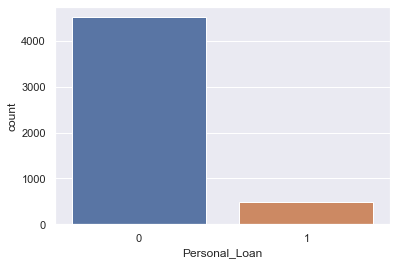

In [11]:
sns.countplot(x=bdf['Personal_Loan']);
print(bdf['Personal_Loan'].value_counts());

#### 4520 have'nt accept personal loan offer and 480 customer have accepted personal loan offer in the Campaign

CD_Account        0    1
Personal_Loan           
0              4358  162
1               340  140


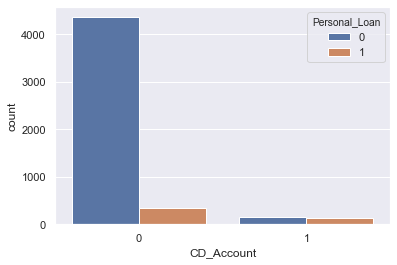

In [12]:
sns.countplot(x=bdf['CD_Account'], hue=bdf['Personal_Loan']);
print(pd.pivot_table(data=bdf,index='Personal_Loan',columns='CD_Account',aggfunc='size'))

#### Out of 5000 customers only 302 customers have CD Accounts with bank and 4698 doen't have CD accounts with bank.
#### Customer who don't have CD with have higher acceptance of Personal Loan offer.

Securities_Account     0    1
Personal_Loan                
0                   4058  462
1                    420   60


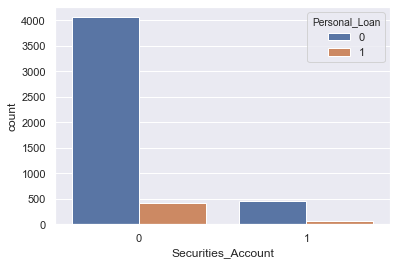

In [13]:
print(pd.pivot_table(data=bdf,index='Personal_Loan',columns='Securities_Account',aggfunc='size'))
sns.countplot(x=bdf['Securities_Account'], hue=bdf['Personal_Loan']);

#### 522 customers have securirties account with Bank and 4478 doesn't. 
#### 462 Customer accepted personal loan offer who doen't have securities account with Bank

Online            0     1
Personal_Loan            
0              1827  2693
1               189   291


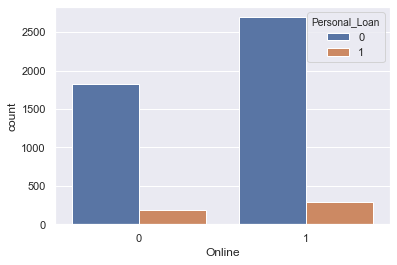

In [14]:
print(pd.pivot_table(data=bdf,index='Personal_Loan',columns='Online',aggfunc='size'))
sns.countplot(x=bdf['Online'], hue=bdf['Personal_Loan']);

#### Nearly 60 % customer are using Online Banking facility and 40 % are still not.
#### Those customer have online access have opt for more Personal Loan. Bank may target offline customer to convert them online aslo balance online customer for Personal Loan

CreditCard        0     1
Personal_Loan            
0              3193  1327
1               337   143


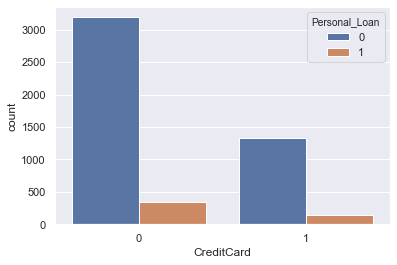

In [15]:
print(pd.pivot_table(data=bdf,index='Personal_Loan',columns='CreditCard',aggfunc='size'))
sns.countplot(x=bdf['CreditCard'], hue=bdf['Personal_Loan']);

#### Nearly 30 % people are using credit card with Bank and rest are not. 
#### Distribtion of Personal loan acceptance among CC holder and not holder is symetric.

Education         1     2     3
Personal_Loan                  
0              2003  1221  1296
1                93   182   205


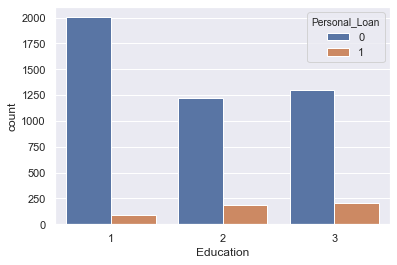

In [16]:
print(pd.pivot_table(data=bdf,index='Personal_Loan',columns='Education',aggfunc='size'))
sns.countplot(x=bdf['Education'], hue=bdf['Personal_Loan']);

#### Personal loan distribution with Education Level is very clear, highly Educated Customer willing to accept the personal loan offer.

Family            1     2    3     4
Personal_Loan                       
0              1365  1190  877  1088
1               107   106  133   134


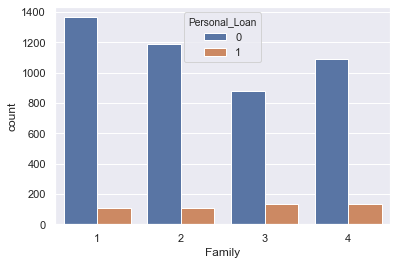

In [17]:
print(pd.pivot_table(data=bdf,index='Personal_Loan',columns='Family',aggfunc='size'))
sns.countplot(x=bdf['Family'], hue=bdf['Personal_Loan']);

#### Personal Loan acceptance increases as Family size increases.

### Distribution Non Categorical Attributes

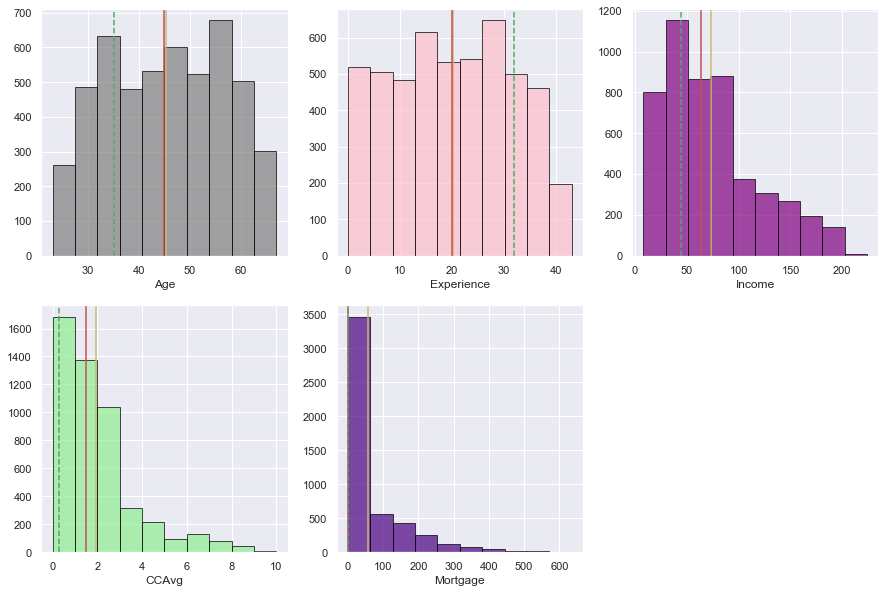

In [18]:
plt.figure(figsize= (15,10))
plt.subplot(2,3,1)
plt.hist(bdf.Age, color='grey', edgecolor = 'black', alpha = 0.7)
plt.axvline(bdf['Age'].mean(), color='y')
plt.axvline(bdf['Age'].median(), color='r')
plt.axvline(bdf['Age'].mode()[0], color='g', linestyle='--')
plt.xlabel('Age')

plt.subplot(2,3,2)
plt.hist(bdf.Experience, color='pink', edgecolor = 'black', alpha = 0.7)
plt.axvline(bdf['Experience'].mean(), color='y')
plt.axvline(bdf['Experience'].median(), color='r')
plt.axvline(bdf['Experience'].mode()[0], color='g', linestyle='--')
plt.xlabel('Experience')

plt.subplot(2,3,3)
plt.hist(bdf.Income, color='purple', edgecolor = 'black', alpha = 0.7)
plt.axvline(bdf['Income'].mean(), color='y')
plt.axvline(bdf['Income'].median(), color='r')
plt.axvline(bdf['Income'].mode()[0], color='g', linestyle='--')
plt.xlabel('Income')

plt.subplot(2,3,4)
plt.hist(bdf.CCAvg, color='lightgreen', edgecolor = 'black', alpha = 0.7)
plt.axvline(bdf['CCAvg'].mean(), color='y')
plt.axvline(bdf['CCAvg'].median(), color='r')
plt.axvline(bdf['CCAvg'].mode()[0], color='g', linestyle='--')
plt.xlabel('CCAvg')

plt.subplot(2,3,5)
plt.hist(bdf.Mortgage, color='indigo', edgecolor = 'black', alpha = 0.7)
plt.axvline(bdf['Mortgage'].mean(), color='y')
plt.axvline(bdf['Mortgage'].median(), color='r')
plt.axvline(bdf['Mortgage'].mode()[0], color='g', linestyle='--',)
plt.xlabel('Mortgage')


plt.show()

In [19]:
bdf.iloc[:,1:9].mode()

,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage
0,35,32,44,94720,1,0.3,1,0


#### Distribution of Age and Experience attribute is symetric in nature and Normal as Mean and Median is equivalent but Mode < Mean & Median in Age colunm and Mode > Mean & Median indicates both colunms ditribution is apposite skewed.

#### In Income and CCAvg attributes Mode<Median<mean or Mean>Median>Mode indiacated that Distribution is Right Skewed

##### Morgage Distribution is Right Skewed but Mode & Median value is Zero 0 and Mean is 56 shows presence of Outliers

### Visualisation Outliers in Data

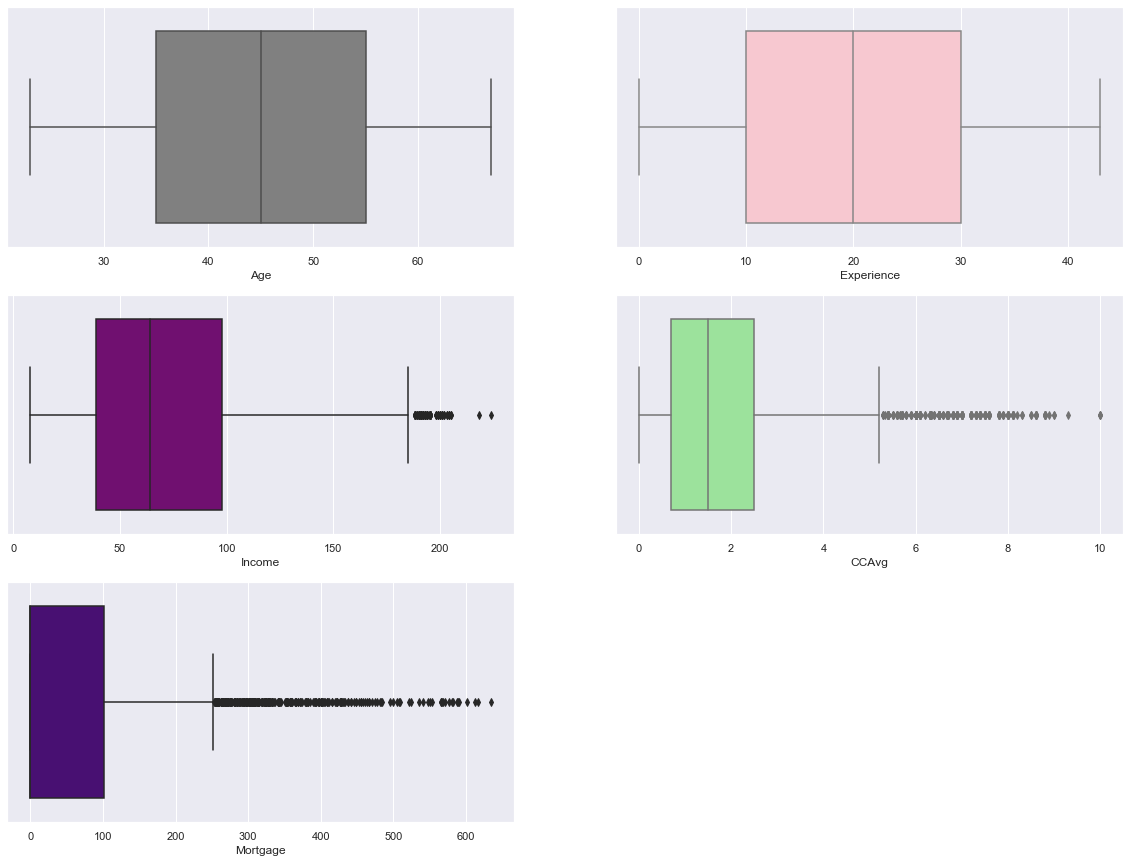

In [20]:
# Use Boxtplot to check outliers.
plt.figure(figsize= (20,15))
plt.subplot(3,2,1)
sns.boxplot(x= bdf.Age, color='grey')

plt.subplot(3,2,2)
sns.boxplot(x= bdf.Experience, color='pink')

plt.subplot(3,2,3)
sns.boxplot(x=bdf.Income, color='purple')
plt.subplot(3,2,4)
sns.boxplot(x=bdf.CCAvg, color='lightgreen')
plt.subplot(3,2,5)
sns.boxplot(x=bdf.Mortgage, color='indigo')

plt.show()

#####  Income, CCAvg and Mortgage have presence of Outliers or extreme values
##### Distribution of Mortgage is highly skewed.

### Pair Plot Visualisation for Understanding Data Relation

In [21]:
bdf.drop(['ID','ZIP_Code'], axis=1, inplace=True)

##### ID & Zip_Code require to drop due to irrelevance with Data Frame

C:\Users\bappa.bhalsing\AppData\Local\conda\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\bappa.bhalsing\AppData\Local\conda\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


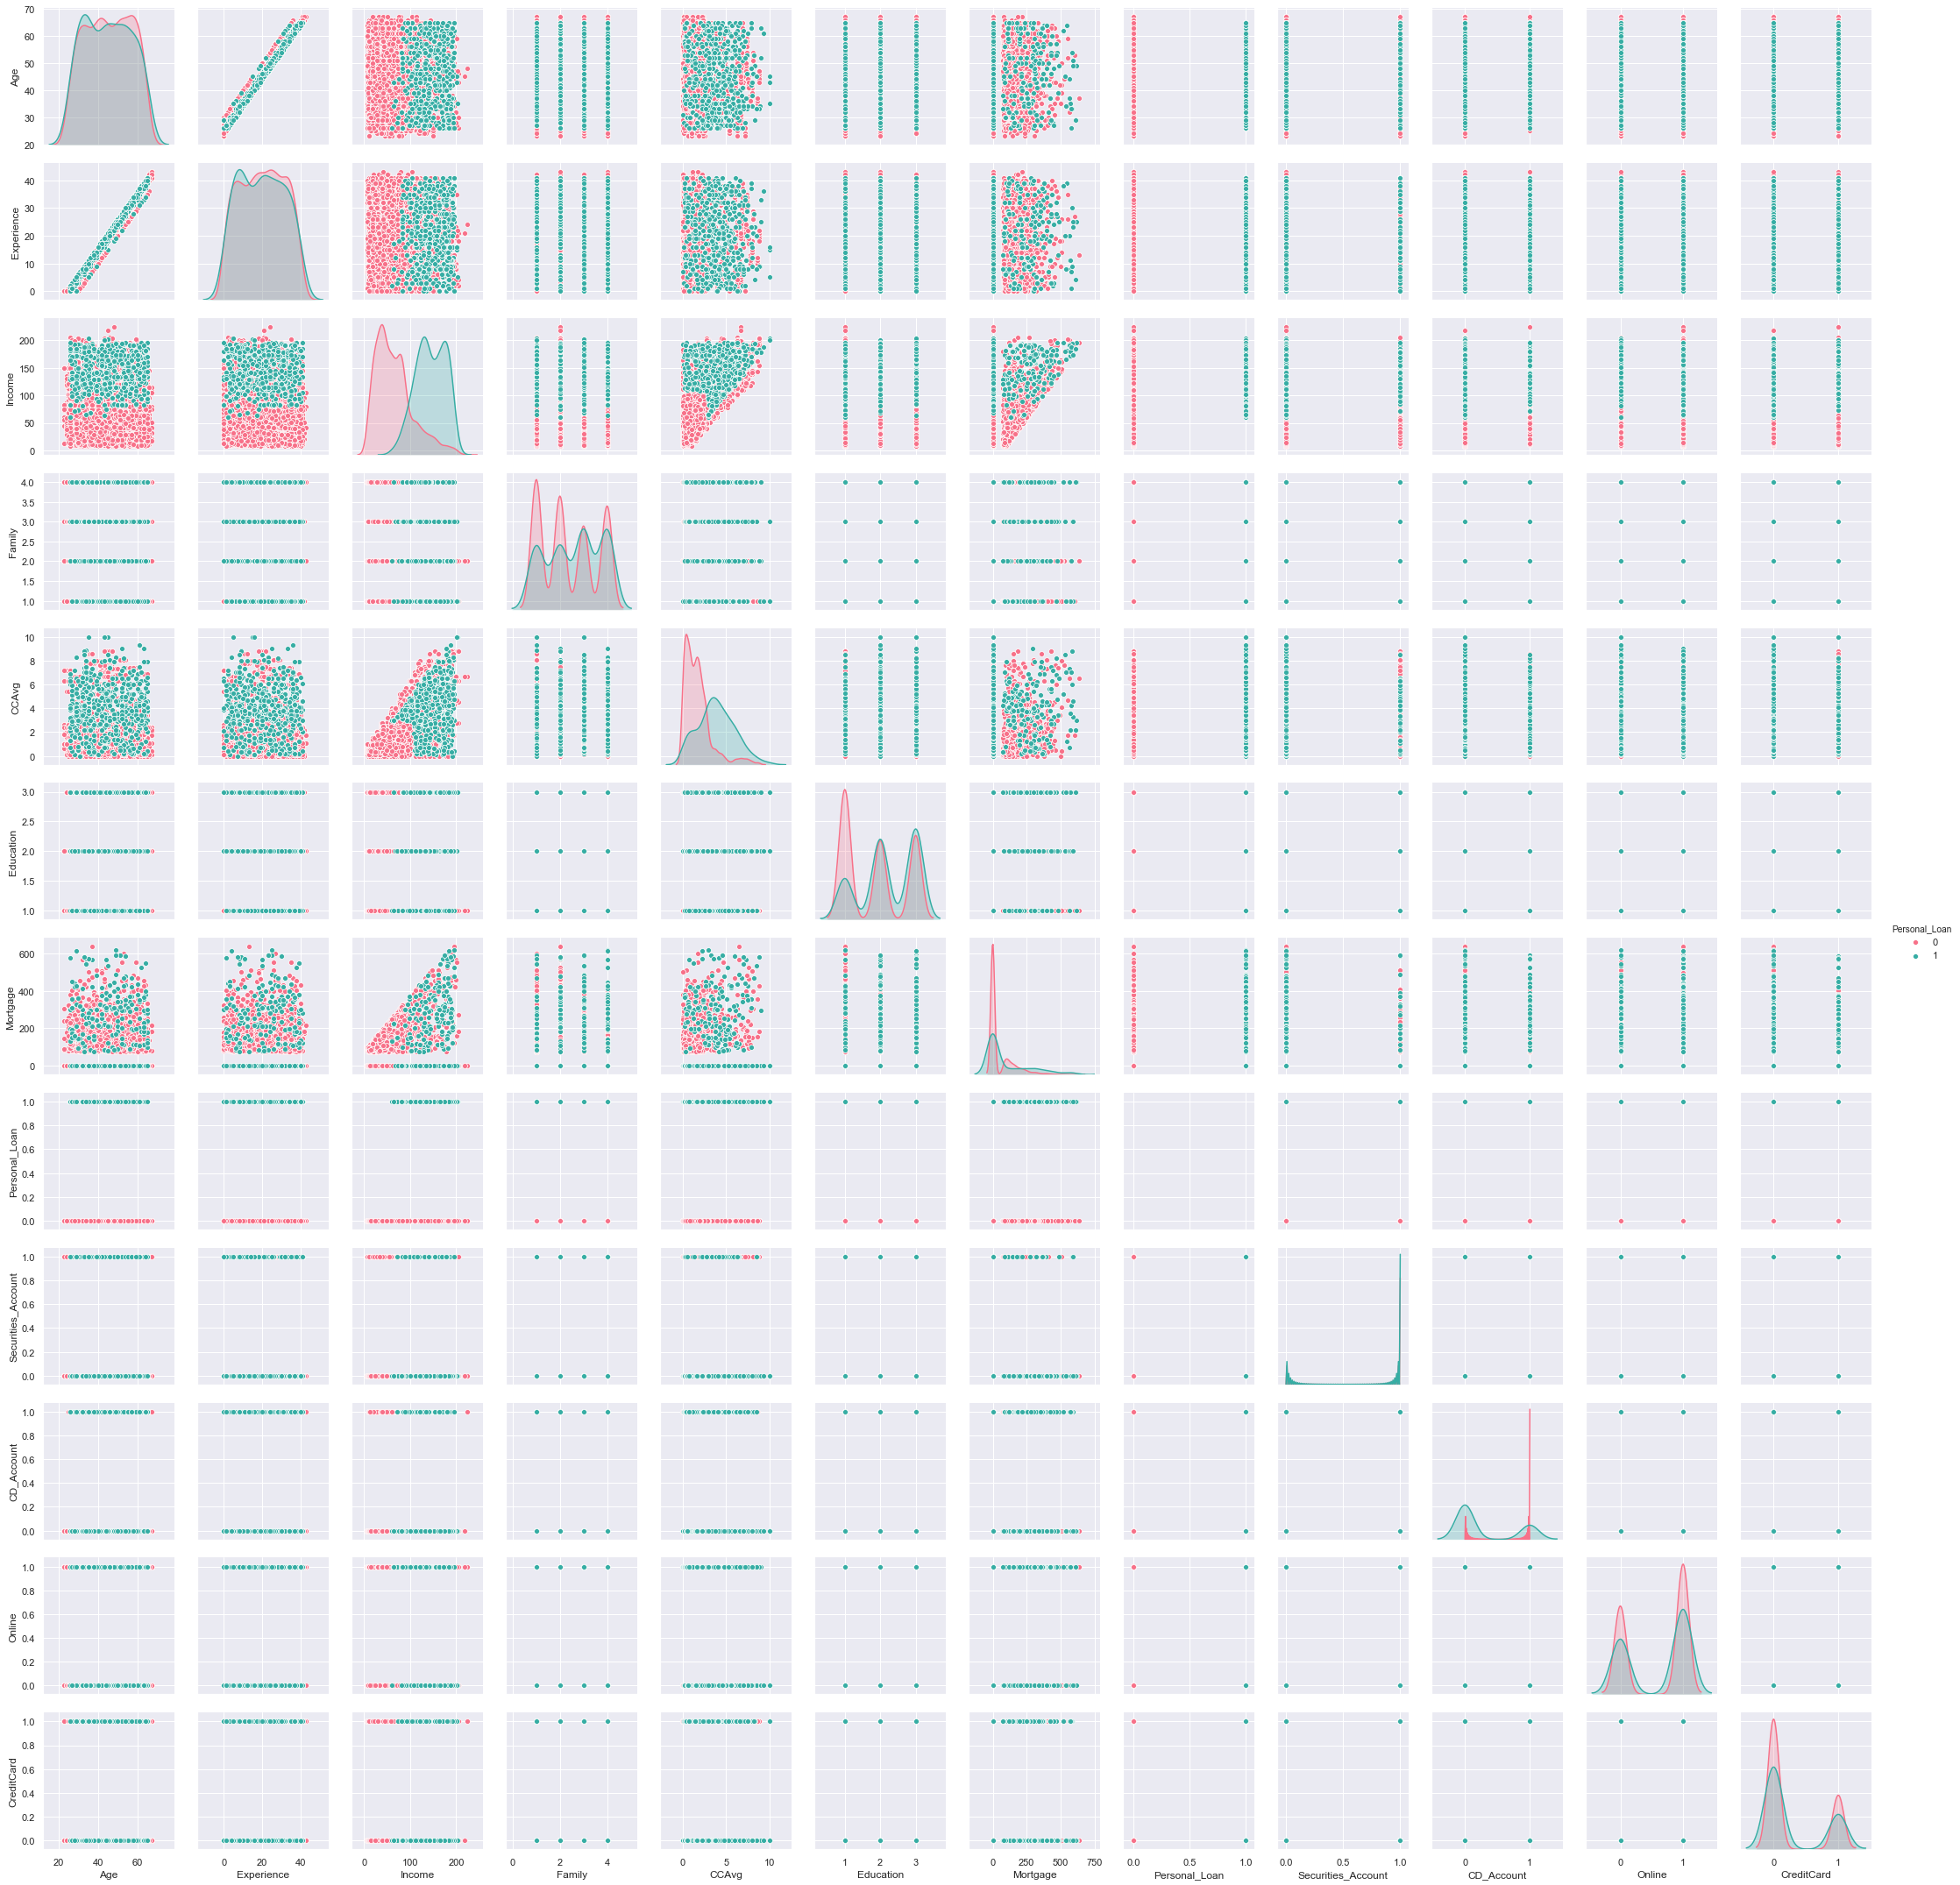

In [22]:
# Pair Plot with Target Variable visualisation with other independent variable
sns.pairplot(data=bdf, hue='Personal_Loan' , palette='husl')

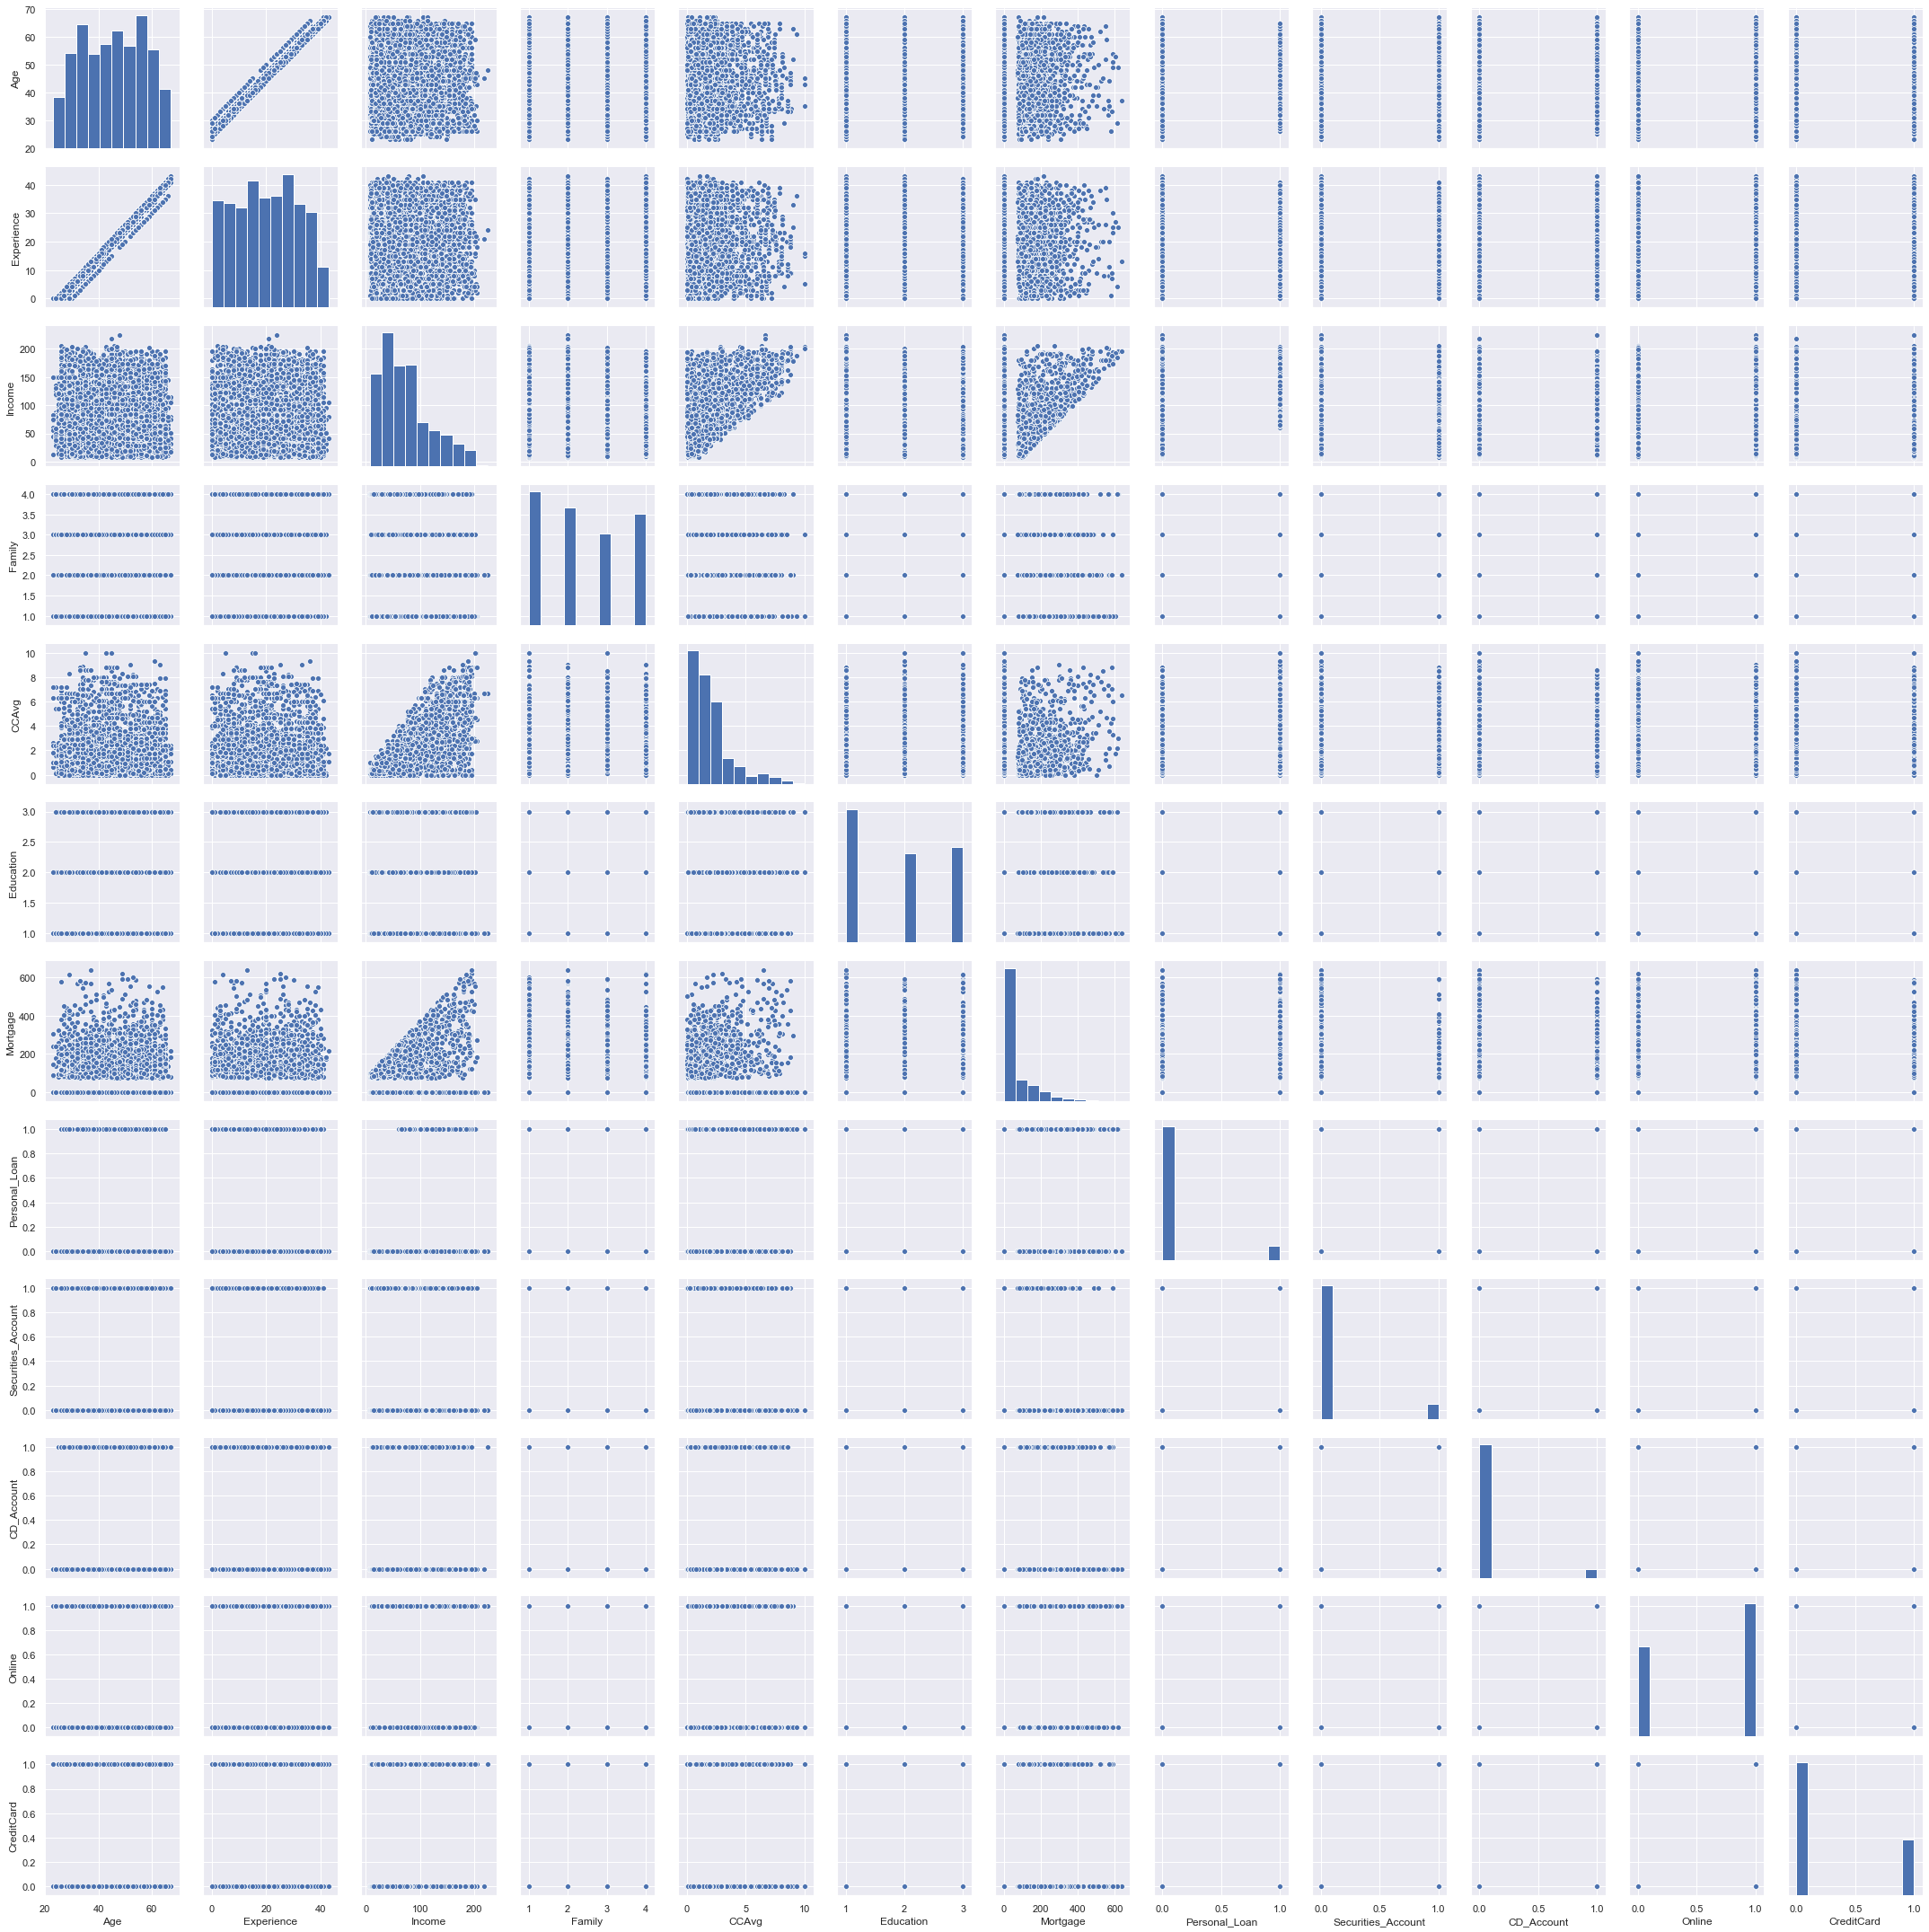

In [23]:
# Pair Plot for Variable visualisation with each other
sns.pairplot(data=bdf)

##### Pairplot has further limitation to show relation with every attributes in this case, so we will use correlation function to derive right relationship of attributes

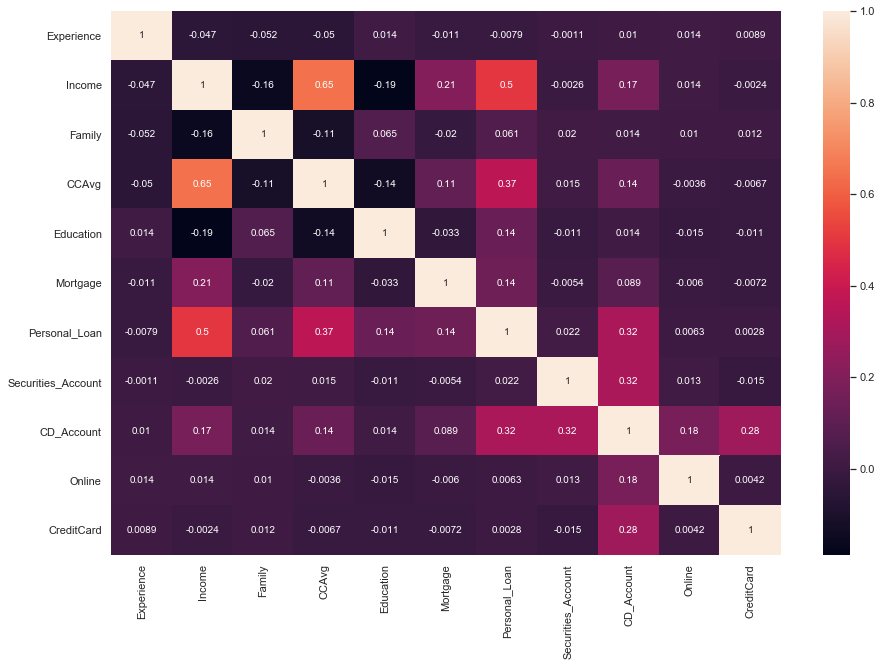

In [24]:
bdf.iloc[:,1:15].corr()
corr=bdf.iloc[:,1:15].corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True);

### Conclusion on Pairplot and Correlation Map
##### Pair of Income with Age & Experience clearly indicates perfect correlation
##### CC Avg to Income have higher correlation than others
##### Personal and Income have another higher correlation

### Outscope of Target Variable
#### The Target variable in this data set is Personal Loan Attribute

In [25]:
# Calling of correlation factor for Personal Loan attribute rest others.
bdf.corr().loc['Personal_Loan']

Age                  -0.007726
Experience           -0.007858
Income                0.502462
Family                0.061367
CCAvg                 0.366889
Education             0.136722
Mortgage              0.142095
Personal_Loan         1.000000
Securities_Account    0.021954
CD_Account            0.316355
Online                0.006278
CreditCard            0.002802
Name: Personal_Loan, dtype: float64

#####  High Correlation of Personal Loan, the dependent variable with independent variable like is Income, CC Avg & CD_account

##### Higher Income group category accepted the Personal Loan offer.

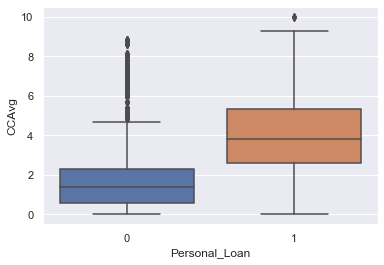

In [26]:
sns.boxplot(y='CCAvg',x='Personal_Loan',data = bdf);

##### Customer having higher CC Average spending also accepted Personal Loan

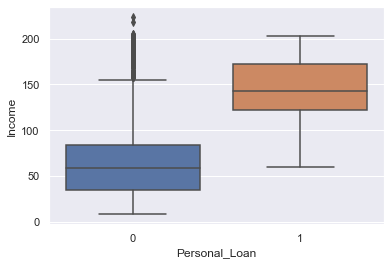

In [27]:
sns.boxplot(y='Income', x='Personal_Loan',data = bdf);

##### Outliers present in Customer who does not taken Pesonal Loan.

### Data Preparation for Train & Test Set

In [28]:
Fa = pd.get_dummies(bdf['Family'], prefix='Family')
#Adding the results to the master dataframe
bdf1 = pd.concat([bdf,Fa], axis=1)

In [29]:
#Creating education dummy Variables
Edu = pd.get_dummies(bdf['Education'], prefix='Education')
#Adding the results to the master dataframe
bdf1 = pd.concat([bdf1,Edu], axis=1)

In [30]:
# We have created dummies for the below variables, so we can drop them
##bdf2 is our new dataset after cleaning and transformation
bdf2=bdf1.drop(['Education','Family'],1)


### Split of Data in to Train & Test set in the ratio of 70:30 respectively

In [31]:
# Importing all necessary library
from sklearn.model_selection import train_test_split
X = bdf2.drop('Personal_Loan', axis=1)
y = bdf2[['Personal_Loan']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)


In [32]:
X_test.shape

(1500, 16)

In [33]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(bdf2.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(bdf2.index)) * 100))

70.00% data is in training set
30.00% data is in test set


### Model Implementation

### Logistic Regression

In [34]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
#predict on test
y_predict = model.predict(X_test)

C:\Users\bappa.bhalsing\AppData\Local\conda\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predict))
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1342
           1       0.84      0.65      0.73       158

    accuracy                           0.95      1500
   macro avg       0.90      0.82      0.85      1500
weighted avg       0.95      0.95      0.95      1500

Accuracy: 0.95


In [36]:
model_score = model.score(X_test, y_test)
print(model_score)

0.95


##### The accuracy of test data set is 95 %

[[ 102   56]
 [  19 1323]]


<Figure size 504x360 with 0 Axes>

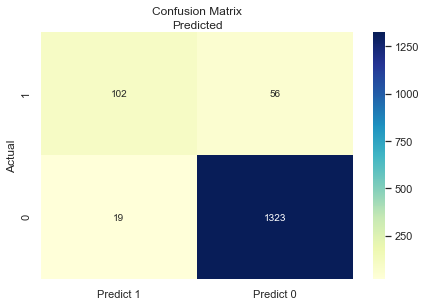

In [37]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
fig, ax = plt.subplots()
sns.heatmap(df_cm, annot=True,cmap="YlGnBu",fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
print(cm)

##### The confusion matrix

##### True Positives (TP): we correctly predicted that 102 Customer accepted Offer 

##### True Negatives (TN): we correctly predicted that 1323 Customer rejected offer

##### False Positives (FP): we incorrectly predicted that 56 Customer accepted offer (a "Type I error") 

##### False Negatives (FN): we incorrectly predicted that 19 Customer not accepted offer (a "Type II error") 

In [38]:
#true positives (TP): These are cases in which we predicted yes, and actually took loan.
TP=102
#true negatives (TN): We predicted no, and they actually did not took loan.
TN=1323
#false positives (FP): We predicted yes, but they don't actually took loan.(Also known as a "Type I error.")
FP=56
#false negatives (FN): We predicted no, but they actually took loan.(Also known as a "Type II error.")
FN=19

In [39]:
Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of logistic regression classifier on test set: {:.2%}'.format(Accuracy))

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))

#Recall
Sensitivity=TP/(FN+TP)
print('Sensitivity:When its actually yes how often it predicts yes : {:.2%}'.format(Sensitivity))

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))


Accuracy of logistic regression classifier on test set: 95.00%
Misclassification Rate: It is often wrong: 5.00%
Sensitivity:When its actually yes how often it predicts yes : 84.30%
Specificity: When its actually no, how often does it predict no: 95.94%
Precision: When it predicts yes, how often is it correct: 64.56%


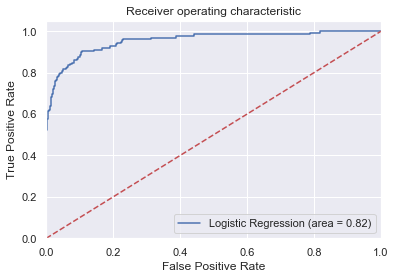

In [40]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Conclusion
##### 1. Model needs more data to train itself.
##### 2. Specificity is fine
##### 3. Recommend to to Check accuracy with KNN Model
##### 4.Maximum the area under ROC better the model performs, its 82 %( 0.82) in this case.


### K-NN Classification

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [42]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.
# Learning reference from GreatLearning Video module

XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()

,Age,Experience,Income,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,2.478018e-17,5.595524e-17,1.939449e-16,-2.078338e-17,2.810197e-16,5.092149e-16,4.426903e-16,2.986500e-16,-3.697931e-16,4.554579e-16,3.852474e-16,-7.339018e-16,-1.016964e-17,-6.365575e-16,-2.122302e-16,-3.148592e-17
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.948906e+00,-1.758808e+00,-1.428969e+00,-1.108987e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01,-6.459362e-01,-5.915167e-01,-5.031231e-01,-5.687280e-01,-8.495664e-01,-6.245376e-01,-6.549654e-01
25%,-9.019702e-01,-8.846315e-01,-7.554825e-01,-7.084116e-01,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01,-6.459362e-01,-5.915167e-01,-5.031231e-01,-5.687280e-01,-8.495664e-01,-6.245376e-01,-6.549654e-01
50%,-2.952359e-02,-1.045515e-02,-2.123482e-01,-2.506106e-01,-5.555239e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,-6.453143e-01,-6.459362e-01,-5.915167e-01,-5.031231e-01,-5.687280e-01,-8.495664e-01,-6.245376e-01,-6.549654e-01
75%,8.429230e-01,8.637212e-01,5.263146e-01,3.216407e-01,4.375576e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,1.549632e+00,1.548141e+00,1.690569e+00,-5.031231e-01,-5.687280e-01,1.177071e+00,1.601185e+00,1.526798e+00
max,1.889859e+00,2.000150e+00,3.263712e+00,4.613525e+00,5.688108e+00,2.928915e+00,3.944146e+00,8.219509e-01,1.549632e+00,1.548141e+00,1.690569e+00,1.987585e+00,1.758310e+00,1.177071e+00,1.601185e+00,1.526798e+00


In [43]:
X1_train, X1_test, y1_train, y1_test = train_test_split(XScaled, y, test_size=0.30, random_state=1)

In [44]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )


In [45]:
# Call Nearest Neighbour algorithm

NNH.fit(X1_train, y1_train)

C:\Users\bappa.bhalsing\AppData\Local\conda\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [46]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(X1_test)
NNH.score(X1_test, y1_test)

0.948

In [47]:
print(classification_report(y1_test,predicted_labels))
print("Accuracy:",metrics.accuracy_score(y1_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1351
           1       0.95      0.50      0.66       149

    accuracy                           0.95      1500
   macro avg       0.95      0.75      0.81      1500
weighted avg       0.95      0.95      0.94      1500

Accuracy: 0.948


##### The accuracy of test data set is 94.8 %

[[  75   74]
 [   4 1347]]


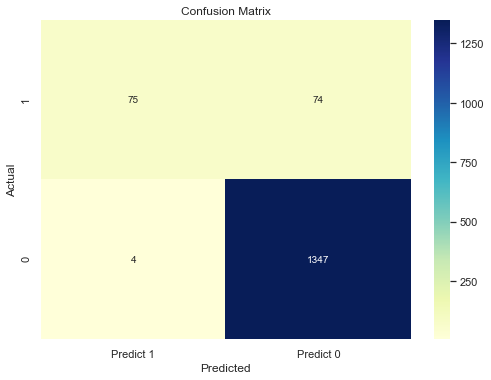

In [48]:
cm1=metrics.confusion_matrix(y1_test, predicted_labels, labels=[1, 0])

df_cm1 = pd.DataFrame(cm1, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm1, annot=True,cmap="YlGnBu",fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
print(cm1)

##### The confusion matrix

##### True Positives (TP): we correctly predicted that 75 Customer accepted Offer 

##### True Negatives (TN): we correctly predicted that 1347 Customer rejected offer

##### False Positives (FP): we incorrectly predicted that 74 Customer accepted offer (a "Type I error") 

##### False Negatives (FN): we incorrectly predicted that 4 Customer not accepted offer (a "Type II error") 

In [49]:
#true positives (TP): These are cases in which we predicted yes, and actually took loan.
TP=75
#true negatives (TN): We predicted no, and they actually did not took loan.
TN=1347
#false positives (FP): We predicted yes, but they don't actually took loan.(Also known as a "Type I error.")
FP=74
#false negatives (FN): We predicted no, but they actually took loan.(Also known as a "Type II error.")
FN=4

In [50]:
Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of KNN classifier on test set: {:.2%}'.format(Accuracy))

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))

#Recall
Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))


Accuracy of KNN classifier on test set: 94.80%
Misclassification Rate: It is often wrong: 5.20%
Sensitivity: When its actually yes how often it predicts yes: 94.94%
Specificity: When its actually no, how often does it predict no: 94.79%
Precision: When it predicts yes, how often is it correct: 50.34%


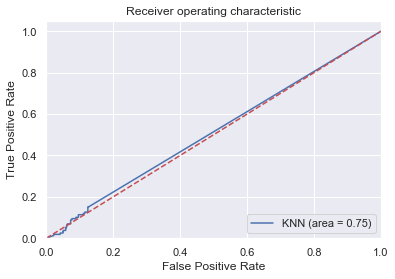

In [51]:
KNN_roc_auc = roc_auc_score(y1_test, NNH.predict(X1_test))
fpr, tpr, thresholds = roc_curve(y_test, NNH.predict_proba(X1_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % KNN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### Conclusion
##### 1. Accusary of this Model is 94.8 %
##### 2. Specificity is 94.79 % and equivalent to accurassy indicates further less scope for this mode.
##### 3. Recommend to to Check accuracy with Naive Bayes Classification
##### 4.Maximum the area under ROC better the model performs, its 75 %( 0.75) in this case.

### Naïve Bayes Classification 

In [52]:
# using Gaussian algorithm from Naive Bayes
from sklearn.naive_bayes import GaussianNB 


In [53]:
# creatw the model
BNB= GaussianNB()
BNB.fit(X_train, y_train)

C:\Users\bappa.bhalsing\AppData\Local\conda\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [54]:
BNBtrain_predict = BNB.predict(X_train)

from sklearn import metrics
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, BNBtrain_predict)))

Model Accuracy: 0.9014


In [55]:
BNBtest_predict = BNB.predict(X_test)
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, BNBtest_predict)))

Model Accuracy: 0.9013


In [56]:
print(classification_report(y_test,BNBtest_predict))
print("Accuracy:",metrics.accuracy_score(y_test, BNBtest_predict))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1342
           1       0.53      0.64      0.58       158

    accuracy                           0.90      1500
   macro avg       0.74      0.79      0.76      1500
weighted avg       0.91      0.90      0.91      1500

Accuracy: 0.9013333333333333


##### The accuracy of test data set is 90.27 %

[[ 101   57]
 [  91 1251]]


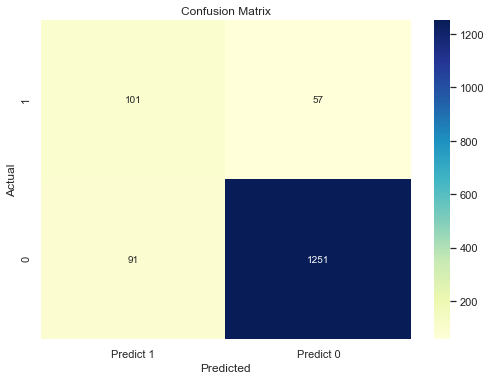

In [57]:
cm2=metrics.confusion_matrix(y_test, BNBtest_predict, labels=[1, 0])

df_cm2 = pd.DataFrame(cm2, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm2, annot=True,cmap="YlGnBu",fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
print(cm2)

##### The confusion matrix

##### True Positives (TP): we correctly predicted that 101 Customer accepted Offer 

##### True Negatives (TN): we correctly predicted that 1251 Customer rejected offer

##### False Positives (FP): we incorrectly predicted that 57 Customer accepted offer (a "Type I error") 

##### False Negatives (FN): we incorrectly predicted that 91 Customer not accepted offer (a "Type II error") 

In [58]:
#true positives (TP): These are cases in which we predicted yes, and actually took loan.
TP=101
#true negatives (TN): We predicted no, and they actually did not took loan.
TN=1251
#false positives (FP): We predicted yes, but they don't actually took loan.(Also known as a "Type I error.")
FP=57
#false negatives (FN): We predicted no, but they actually took loan.(Also known as a "Type II error.")
FN=91

In [59]:
Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of Gaussian Naive Bayes classifier on test set: {:.2%}'.format(Accuracy))

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))

#Recall
Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))


Accuracy of Gaussian Naive Bayes classifier on test set: 90.13%
Misclassification Rate: It is often wrong: 9.87%
Sensitivity: When its actually yes how often it predicts yes: 52.60%
Specificity: When its actually no, how often does it predict no: 95.64%
Precision: When it predicts yes, how often is it correct: 63.92%


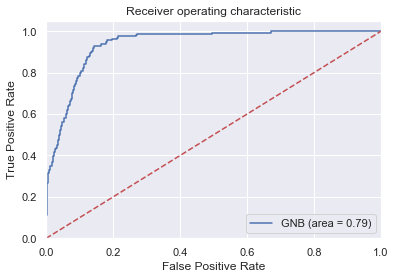

In [60]:
GNB_roc_auc = roc_auc_score(y_test, BNB.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, BNB.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='GNB (area = %0.2f)' % GNB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

#### Area under ROC of Guassia Naive Bayes is 79 %

#### Conclusion
##### 1. Accuracy of this Model is 90.13%
##### 2. Specificity is 95.64% and higher to accurassy indicates further less scope for this mode.
##### 3. Maximum the area under ROC better the model performs, its 79 %( 0.79) in this case.

### Final Result and Conclusion of Project

#### Result of 3 Models

In [61]:
 # Results of all 3 Model to conclude the Best Model

 # Parameter                Logistic Model       K-NN            Guassian Naive Bayes                               
 # Accuracy                     95.00%          94.80%                  90.13%
 # Misclassification Rate        5.00%           5.20%                   9.87%
 # Sensitivity                  84.30%          94.94%                  52.60%
 # Specificity                  95.94%          94.79%                  95.64%
 # Precision                    64.56%          50.34%                  63.92% 
 # Area Under ROC               82.00%          75.00%                  79.00%



### Conclusion

#### Logistic model performs the best, evident from above results but KNN model has very close accuracy with Logistics Model .However, Sensitivity is higher in KNN.
#### The Personal Loan offer acceptance prediction varied among the model as data is not balanced. Data represented the true picture of market i.e. person who took loan are on lower side.

#### The application of KNN model  will change Bank's approach and target only those predicted as yes first, it is 50.34 % (Precision) chance they will take loan. Hence chances  of customer tp take personal loan will be increases.
#### Though Sensitivity KNN Model is around 95 % still we end up offering more loans at end of program
#### Area Under ROC is 82 % in Logistic Model  and KNN model is 75 % indicated that Personal Loan offer acceptance likely greater in Logistic Model..
#### Bank May choose KNN or Logistics Model for enhance their Personal Loan acceptance as their results are very near.
#### Suggestion on above result is to choose KNN Model.


### Thanks Note
#### Thanks for reading my project thoroughly and understand the each finding carefully. The reference has been taken from Great Leanings Video and other provided notes. 
